In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

In [3]:
batch_size = 20
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [4]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

In [5]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_output, labels = y_target)

In [6]:
my_opt = tf.train.GradientDescentOptimizer(0.19)
train_step = my_opt.minimize(xentropy)

In [7]:
init = tf.global_variables_initializer()

Now we will train our linear model with 1000 iterations.Now we will train our linear model with 1000 iterations. We will feed in the three data
points that we require: petal length, petal width, and the target variable. 
# Every 200 iterations we will print the variable values:

In [103]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(5000):
        rand_index = np.random.choice(len(iris_2d), size=batch_size)
        rand_x = iris_2d[rand_index]
        rand_x1 = np.array([[x[0]] for x in rand_x])
        rand_x2 = np.array([[x[1]] for x in rand_x])
        rand_y = np.array([[y] for y in binary_target[rand_index]])
        sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data:rand_x2, y_target: rand_y})
        if (i+1)%200==0:
            print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b= ' + str(sess.run(b)))

Step #200 A = [[11.866301]], b= [[-5.8149304]]
Step #400 A = [[13.612514]], b= [[-7.1445656]]
Step #600 A = [[14.655892]], b= [[-8.077563]]
Step #800 A = [[15.527879]], b= [[-8.631413]]
Step #1000 A = [[16.13612]], b= [[-9.186052]]
Step #1200 A = [[16.628952]], b= [[-9.745379]]
Step #1400 A = [[17.16372]], b= [[-10.023938]]
Step #1600 A = [[17.622517]], b= [[-10.306026]]
Step #1800 A = [[17.928162]], b= [[-10.686726]]
Step #2000 A = [[18.31588]], b= [[-10.906104]]
Step #2200 A = [[18.558868]], b= [[-11.317199]]
Step #2400 A = [[18.908493]], b= [[-11.442855]]
Step #2600 A = [[19.132483]], b= [[-11.72645]]
Step #2800 A = [[19.4512]], b= [[-11.855927]]
Step #3000 A = [[19.687592]], b= [[-12.065604]]
Step #3200 A = [[19.865133]], b= [[-12.323118]]
Step #3400 A = [[20.065516]], b= [[-12.514347]]
Step #3600 A = [[20.338085]], b= [[-12.613325]]
Step #3800 A = [[20.520626]], b= [[-12.810794]]
Step #4000 A = [[20.706753]], b= [[-13.014805]]
Step #4200 A = [[20.92169]], b= [[-13.179401]]
Step #4

# Plotting the scattered points and the line

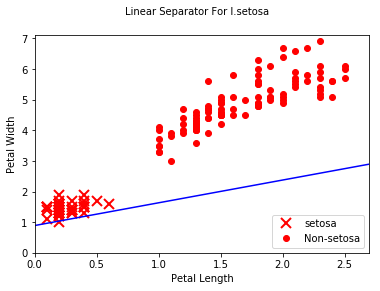

In [104]:
with tf.Session() as sess:
    sess.run(init)
    [[slope]] = sess.run(A)
    [[intercept]] = sess.run(b)
    x = np.linspace(0, 3, num=50)
    ablineValues = []
    for i in x:
        ablineValues.append(slope*i+intercept)
    setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
    setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
    non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
    non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
    plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa''')
    plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
    plt.plot(x, ablineValues, 'b-')
    plt.xlim([0.0, 2.7])
    plt.ylim([0.0, 7.1])
    plt.suptitle('Linear Separator For I.setosa', fontsize=10)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend(loc='lower right')
    plt.show()